<a href="https://colab.research.google.com/github/hernandick/DS_Entrega_Final/blob/main/Proyecto_Integrador_Hernan_Dick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Consigna
Te presentamos los pasos a seguir para realizar el proyecto 04.

1.Elige tu punto de partida entre dos opciones:

-Tus Proyectos 01 y 02

-Tu Proyecto 03

Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

-Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.

-Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.

-Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.

-Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.

Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

#Objetivo

El objetivo de este notebook sera explorar la relacion entre la cantidad de casos de COVID por barrio en la ciudad de Buenos Aires y el precio promedio por metro cuadrado. Evaluando esta relacion podremos inferir si es que existen zonas vulneradas debido al nivel de ingreso que esta directamente relacionado con el costo de la vivienda. Los datos que utilizaremos de casos de covid provienen de la pagina del gobierno de la Ciudad de Buenos Aires.

El Dataset:

El nuevo dataset contiene un listado diario de casos COVID-19 según sexo, edad, provincia, clasificacion, barrio, fecha de toma de muestra, tipo de contagio, alta_medica y fecha de fallecimiento.

Fuente: https://data.buenosaires.gob.ar/dataset/casos-covid-19


In [22]:
#Importamos las librerías que usaremos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Dataset COVID

En Primer lugar trabajaremos con el nuevo dataset. En esta sección se describiran los datos y se preparará el dataset para utilizar los datos.

In [18]:
#importamos los datos
df_covid = pd.read_csv("casos_covid19.csv")
df_covid.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,1013537,03JUN2020:00:00:00.000000,01JUN2020:00:00:00.000000,01JUN2020:00:00:00.000000,CABA,VILLA LUGANO,8.0,femenino,51.0,descartado,NaN,NaN,NaN,NaN
1,1013540,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,CABA,RECOLETA,2.0,femenino,42.0,descartado,NaN,NaN,NaN,NaN
2,1013541,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,CABA,BARRACAS,4.0,femenino,47.0,descartado,NaN,NaN,NaN,NaN
3,1013543,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,04JUN2020:00:00:00.000000,CABA,CONSTITUCION,1.0,femenino,35.0,descartado,NaN,NaN,NaN,NaN
4,1013549,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,CABA,BARRACAS,4.0,femenino,22.0,descartado,NaN,NaN,NaN,NaN


In [163]:
instancias , columnas = df_covid.shape
print('el dataset tiene', instancias, "instancias y", columnas , "columnas ")

el dataset tiene 802397 instancias y 14 columnas 


In [164]:
#Convertimos los nombres de barrio a minuscula ya que nos servirá para vincularlos con nuestro dataset de propiedades
df_covid['barrio'] = df_covid['barrio'].str.lower()

df_covid.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,1013537,03JUN2020:00:00:00.000000,01JUN2020:00:00:00.000000,01JUN2020:00:00:00.000000,CABA,villa lugano,8.0,femenino,51.0,descartado,NaN,NaN,NaN,NaN
1,1013540,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,CABA,recoleta,2.0,femenino,42.0,descartado,NaN,NaN,NaN,NaN
2,1013541,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,CABA,barracas,4.0,femenino,47.0,descartado,NaN,NaN,NaN,NaN
3,1013543,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,04JUN2020:00:00:00.000000,CABA,constitucion,1.0,femenino,35.0,descartado,NaN,NaN,NaN,NaN
4,1013549,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,03JUN2020:00:00:00.000000,CABA,barracas,4.0,femenino,22.0,descartado,NaN,NaN,NaN,NaN


In [68]:
#Obtenemos una lista con todos los nombres de barrio y cantidad de casos por barrio
df = df_covid.groupby(['barrio']).count()
df_casos_x_barrio = df["numero_de_caso"]

df_casos_x_barrio

barrio
agronomia             1512
almagro              20294
balvanera            23861
barracas             20266
belgrano             17039
boca                  9149
boedo                 6905
caballito            22555
chacarita             5142
coghlan               2551
colegiales            6551
constitucion          9084
flores               27306
floresta              4880
liniers               5566
mataderos             9009
monserrat             7054
monte castro          3823
nueva pompeya         8963
nuñez                 6959
palermo              35200
parque avellaneda     9062
parque chacabuco      7781
parque chas           2276
parque patricios      7146
paternal              3309
puerto madero         1930
recoleta             23631
retiro               11813
saavedra              5840
san cristobal         8260
san nicolas           6141
san telmo             3412
velez sarsfield       4280
versalles             1536
villa crespo         11154
villa del parque     

In [69]:
#Reemplazamos los  nombres de barrio con los utilizados en el dataset de propiedades
df_casos_x_barrio = df_casos_x_barrio.reset_index()
df_casos_x_barrio['barrio'].replace('agronomia', 'agronomía', inplace=True)
df_casos_x_barrio['barrio'].replace('constitucion', 'constitución', inplace=True)
df_casos_x_barrio['barrio'].replace('villa gral. mitre', 'villa general mitre', inplace=True)
df_casos_x_barrio['barrio'].replace('san nicolas', 'san nicolás', inplace=True)
df_casos_x_barrio['barrio'].replace('villa pueyrredon', 'villa pueyrredón', inplace=True)
df_casos_x_barrio

,barrio,numero_de_caso
0,agronomía,1512
1,almagro,20294
2,balvanera,23861
3,barracas,20266
4,belgrano,17039
5,boca,9149
6,boedo,6905
7,caballito,22555
8,chacarita,5142
9,coghlan,2551


#Dataset Properati

En esta seccion trabajaremos con el dataset de properati para adaptarlo a nuestra investigación.

In [94]:
#Importamos los datos y convertimos el nombre del barrio a minusculas.
df_prop = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
df_prop['l3'] = df_prop['l3'].str.lower()

df_prop.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,san cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,la plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [95]:
#Filtramos el dataset para obtener solo las propiedades en CABA que sean departamento, PHs, o Casa
indexDept = df_prop[(df_prop['property_type'] != 'Departamento') &
                  (df_prop['property_type'] != 'PH') &
                  (df_prop['property_type'] != 'Casa')].index
                  
data_filt = df_prop.drop(indexDept)


indexZona = data_filt[data_filt['l2'] != 'Capital Federal' ].index
data_filt = data_filt.drop(indexZona)

data_filt.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,san cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,villa crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [97]:
#Creamos un dataset con el precio por m2 por barrio
data_filt.rename(columns={"l3": "Barrio"}, inplace = True)
df = data_filt.groupby(['Barrio']).mean()
df['precio por m2 cubierto en USD'] = df['price']/df['surface_covered']
df['precio por m2 cubierto en USD'].round(2)
df.drop(columns = ['lat','lon','rooms','bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price'], inplace= True)
df.rename(columns={"l3": "Barrio"}, inplace = True)
df.round(2)

df = df.reset_index()
df['barrio'] = df['Barrio']

df

,Barrio,precio por m2 cubierto en USD,barrio
0,abasto,2537.896174,abasto
1,agronomía,2180.228217,agronomía
2,almagro,2245.074683,almagro
3,balvanera,1856.379207,balvanera
4,barracas,2253.641814,barracas
5,barrio norte,2319.927010,barrio norte
6,belgrano,3599.078763,belgrano
7,boca,992.408633,boca
8,boedo,2094.337015,boedo
9,caballito,1664.617603,caballito


#Analisis de ambos datasets

En esta seccion se analizara la informacion obtenida de ambos datasets para extraer conclusiones

In [99]:
#Juntamos los datos de ambos datasets en uno solo
data_merge = pd.merge(df, df_casos_x_barrio, on= 'barrio')
data_merge = data_merge[['Barrio','precio por m2 cubierto en USD','numero_de_caso']] 
data_merge

,Barrio,precio por m2 cubierto en USD,numero_de_caso
0,agronomía,2180.228217,1512
1,almagro,2245.074683,20294
2,balvanera,1856.379207,23861
3,barracas,2253.641814,20266
4,belgrano,3599.078763,17039
5,boca,992.408633,9149
6,boedo,2094.337015,6905
7,caballito,1664.617603,22555
8,chacarita,2318.862607,5142
9,coghlan,2005.918198,2551


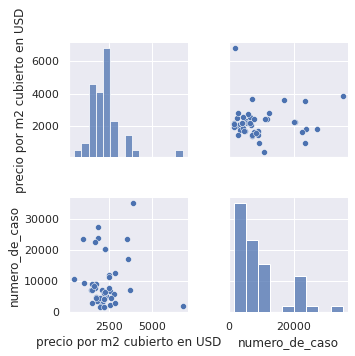

In [206]:
#Creamos un pairplos para buscar patrones en los datos.
sns.pairplot(data = data_merge)
sns.set()



Por lo que podemos observar en el pariplot en principio no observamos un patron claro en los datos en cuanto al precio por metro cuadrado y el numero de casos. Podemos ver que muchos de los barrios tienen una cantidad similar de casos que no parece estar correlacionada con el precio por m2 y notamos algunas exepciones que no parecen ningunun patron.

In [207]:
#Describimos los datos
data_merge.describe()

,precio por m2 cubierto en USD,numero_de_caso
count,47.000000,47.000000
mean,2221.872334,9306.723404
std,969.211224,7904.157587
min,419.491546,1494.000000
25%,1687.295951,4106.500000
50%,2169.953367,6905.000000
75%,2473.819865,10925.500000
max,6832.610131,35200.000000


In [156]:
#Estudiamos los indices de correlacion.
data_merge.corr()

,precio por m2 cubierto en USD,numero_de_caso
precio por m2 cubierto en USD,1.000000,0.038536
numero_de_caso,0.038536,1.000000


Luego de calcular los indices de correlacion entre ambas variables notamos que es muy bajo y hasta ahora podemos decir que no habria ninguna evidencia de que haya correlacion entre ambas variablesl.

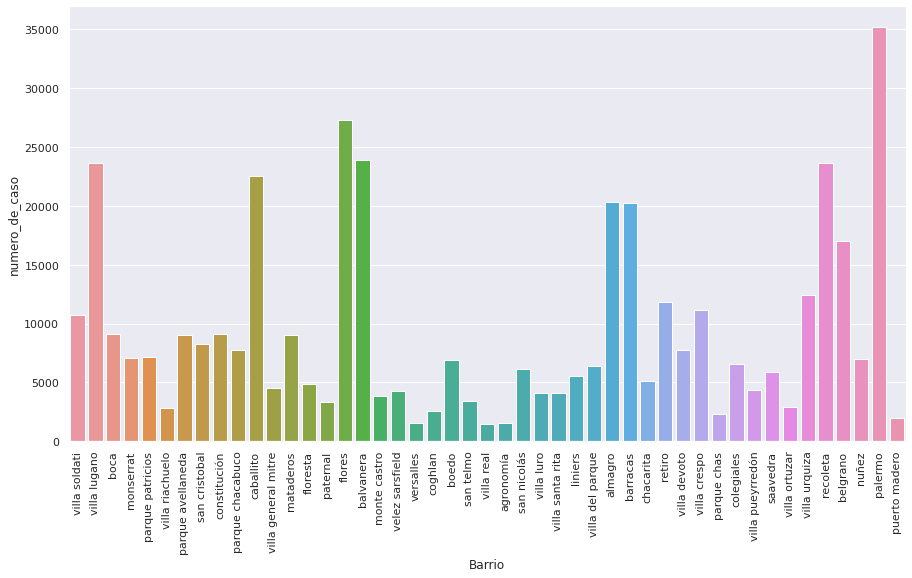

In [205]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = data_merge.Barrio, y = data_merge.numero_de_caso,
                   order = data_merge.sort_values('precio por m2 cubierto en USD').Barrio)
for item in plot.get_xticklabels():
    item.set_rotation(90)


plt.show()

Por ultimo creamos un grafico que nos muestra la cantidad de casos por barrio y ordenados de izuqierda a derecha segun el precio por metro cuadrado del barrio. Con este gráfico terminamos de concluir que no existe una relacion entre la cantidad de casos de covid en un barrio y el precio por metro cuadrado que fue la pregunta que nos propusimos investigar en un principio. Notamos en el grafico que a medida que sube el precio del metro cuadrado de un barrio no hay un patron o tendencia que se destaque. 